# Operacoes basicas nas colunas + missing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

df = pd.read_pickle('teste.pickle')
df.tail()

,user_id,song_id,contagem,artista
1116606,276e43ad698705e5011e5091f367d951b21246f5,SOXJOZW12A6701E90E,7,Queens Of The Stone Age
1116607,276e43ad698705e5011e5091f367d951b21246f5,SOXNKNC12A6701F7A8,1,Rob Zombie
1116608,276e43ad698705e5011e5091f367d951b21246f5,SOYRMVO12A6701D106,1,Godsmack
1116609,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130993,2,Vive la Fete
1116610,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8D130992,50,Diplo


In [2]:
NaN = float('nan')
mesmo_user = 'b80344d063b5ccb3212f76538f3d9e43d87dca9e'
new = pd.DataFrame({'user_id':[mesmo_user,mesmo_user,mesmo_user],
                       'song_id': ['SOAKIMP12A2C130993','SOAKIMP22A8D130992','FOIKIMP22A8F150731'],
                       'contagem':[NaN,NaN,24],
                       'artista': ['Madona', 'Eminen','Steve Reich']},
                   index=[1116611, 1116612,1116613])
cols = new.columns.tolist()
new= new[cols[::-1]]
new.head()

,user_id,song_id,contagem,artista
1116611,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A2C130993,NaN,Madona
1116612,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP22A8D130992,NaN,Eminen
1116613,b80344d063b5ccb3212f76538f3d9e43d87dca9e,FOIKIMP22A8F150731,24.0,Steve Reich


In [3]:
frames = [df,new]
df = pd.concat(frames)
df.tail()

,user_id,song_id,contagem,artista
1116609,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130993,2.0,Vive la Fete
1116610,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8D130992,50.0,Diplo
1116611,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A2C130993,NaN,Madona
1116612,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP22A8D130992,NaN,Eminen
1116613,b80344d063b5ccb3212f76538f3d9e43d87dca9e,FOIKIMP22A8F150731,24.0,Steve Reich


In [4]:
#criando nova coluna com os dados da coluna contagem
df['contagem_norm'] = df['contagem']*1/np.sum(df['contagem'])
df.tail()

,user_id,song_id,contagem,artista,contagem_norm
1116609,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130993,2.0,Vive la Fete,5.442802e-07
1116610,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8D130992,50.0,Diplo,1.360700e-05
1116611,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A2C130993,NaN,Madona,NaN
1116612,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP22A8D130992,NaN,Eminen,NaN
1116613,b80344d063b5ccb3212f76538f3d9e43d87dca9e,FOIKIMP22A8F150731,24.0,Steve Reich,6.531362e-06


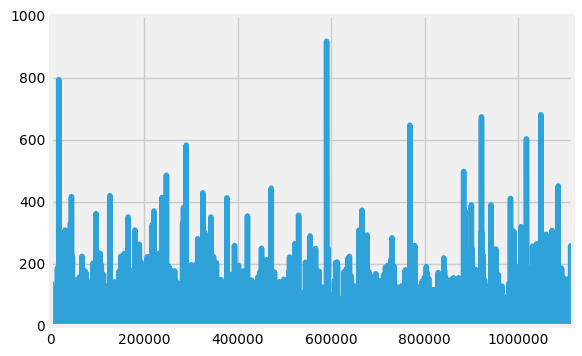

In [5]:
df.plot(legend=None)
plt.show()

# Lidando com missing data

In [6]:
#uma estrategia eh retirar todas as observacoes que contem alguma coluna com NaN
df2 = df.dropna()

#para inplace
#df.dropna(inplace=True)

df.tail()

,user_id,song_id,contagem,artista,contagem_norm
1116609,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130993,2.0,Vive la Fete,5.442802e-07
1116610,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8D130992,50.0,Diplo,1.360700e-05
1116611,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A2C130993,NaN,Madona,NaN
1116612,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP22A8D130992,NaN,Eminen,NaN
1116613,b80344d063b5ccb3212f76538f3d9e43d87dca9e,FOIKIMP22A8F150731,24.0,Steve Reich,6.531362e-06


In [7]:
df2.tail()

,user_id,song_id,contagem,artista,contagem_norm
1116607,276e43ad698705e5011e5091f367d951b21246f5,SOXNKNC12A6701F7A8,1.0,Rob Zombie,2.721401e-07
1116608,276e43ad698705e5011e5091f367d951b21246f5,SOYRMVO12A6701D106,1.0,Godsmack,2.721401e-07
1116609,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130993,2.0,Vive la Fete,5.442802e-07
1116610,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8D130992,50.0,Diplo,1.360700e-05
1116613,b80344d063b5ccb3212f76538f3d9e43d87dca9e,FOIKIMP22A8F150731,24.0,Steve Reich,6.531362e-06


In [8]:
#criamos uma coluna so com Nan
df['new'] = df['contagem']*NaN


In [9]:
df.tail()

,user_id,song_id,contagem,artista,contagem_norm,new
1116609,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130993,2.0,Vive la Fete,5.442802e-07,NaN
1116610,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8D130992,50.0,Diplo,1.360700e-05,NaN
1116611,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A2C130993,NaN,Madona,NaN,NaN
1116612,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP22A8D130992,NaN,Eminen,NaN,NaN
1116613,b80344d063b5ccb3212f76538f3d9e43d87dca9e,FOIKIMP22A8F150731,24.0,Steve Reich,6.531362e-06,NaN


In [10]:
#com esse comando retiramos todas as colunas que possuem todos os valores como NaN
#lembre o default eh axis=0 (linha, index) axis=1 eh coluna
df.dropna(axis=1,how='all', inplace=True)
df.tail()

,user_id,song_id,contagem,artista,contagem_norm
1116609,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130993,2.0,Vive la Fete,5.442802e-07
1116610,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8D130992,50.0,Diplo,1.360700e-05
1116611,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A2C130993,NaN,Madona,NaN
1116612,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP22A8D130992,NaN,Eminen,NaN
1116613,b80344d063b5ccb3212f76538f3d9e43d87dca9e,FOIKIMP22A8F150731,24.0,Steve Reich,6.531362e-06


In [11]:
#Podemos preencher os valores NaN com os valores anteriores do df
df3 = df.fillna(method='ffill')
df3.tail()

,user_id,song_id,contagem,artista,contagem_norm
1116609,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130993,2.0,Vive la Fete,5.442802e-07
1116610,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8D130992,50.0,Diplo,1.360700e-05
1116611,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A2C130993,50.0,Madona,1.360700e-05
1116612,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP22A8D130992,50.0,Eminen,1.360700e-05
1116613,b80344d063b5ccb3212f76538f3d9e43d87dca9e,FOIKIMP22A8F150731,24.0,Steve Reich,6.531362e-06


In [12]:
#Ou com os valores posteriores do df
df4 = df.fillna(method='bfill')
df4.tail()

,user_id,song_id,contagem,artista,contagem_norm
1116609,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130993,2.0,Vive la Fete,5.442802e-07
1116610,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8D130992,50.0,Diplo,1.360700e-05
1116611,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A2C130993,24.0,Madona,6.531362e-06
1116612,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP22A8D130992,24.0,Eminen,6.531362e-06
1116613,b80344d063b5ccb3212f76538f3d9e43d87dca9e,FOIKIMP22A8F150731,24.0,Steve Reich,6.531362e-06


In [13]:
#Ou com os valores de sua escolha
df5 = df.fillna(value=1)
df5.tail()

,user_id,song_id,contagem,artista,contagem_norm
1116609,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130993,2.0,Vive la Fete,5.442802e-07
1116610,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8D130992,50.0,Diplo,1.360700e-05
1116611,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A2C130993,1.0,Madona,1.000000e+00
1116612,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP22A8D130992,1.0,Eminen,1.000000e+00
1116613,b80344d063b5ccb3212f76538f3d9e43d87dca9e,FOIKIMP22A8F150731,24.0,Steve Reich,6.531362e-06
